# **_Left and Right Inverse for Non-Square Matrices_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This notebook demonstrates concepts I learned from a lesson in Mike X. Cohen's Linear Algebra course on Udemy.

-   Udemy course: https://www.udemy.com/course/linear-algebra-theory-and-implementation

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Inverting a Non-Square Matrix?_**

-   A matrix multiplied by its inverse produces the identity matrix.

-   There is no direct inverse to a non-square matrix, so we need a substitute.

-   We can mutate the original matrix into a square form by multiplying it by its transpose, multiplying that compound stucture by its inverse, then factoring out the original matrix.

-   What remains is either the left-inverse (original matrix is _tall_) or the right-inverse (original matrix is _wide_).

-   For a tall (<font color=orangered style="font-weight: bold;">T</font>), full-column rank matrix, we left-multiply by the <font color=orangered style="font-weight: bold;">LEFT-INVERSE</font> to produce the identity matrix:

$$
\huge
    \textcolor{orangered}{
    (\textsf{\textbf{T}}^{\Tau}
    \textsf{\textbf{T}}
    )^{-1}
    \textsf{\textbf{T}}^{\Tau}
    }
    \quad
    \textsf{\textbf{T}}
    =
    {\Iota}
$$

-   For a wide (<font color=dodgerblue style="font-weight: bold;">W</font>), full-row rank matrix, we _right-multiply_ the original matrix by its <font color=dodgerblue style="font-weight: bold;">RIGHT-INVERSE</font>:

$$
\huge
    \textsf{\textbf{W}}
    \quad
    \textcolor{dodgerblue}{
    \textsf{\textbf{W}}^{\Tau}
    (\textsf{\textbf{W}}
    \textsf{\textbf{W}}^{\Tau}
    )^{-1}
    }
    =
    {\Iota}
$$

-   Now we can get on with the business of whatever it is we want to do via multiplication of the original matrix by its inverse, with these substitutes in mind.

-   I'll learn more about that later...

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Python:_**

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sympy as sym

### **_Do the Calculations:_**

In [138]:
m, n = np.random.randint(29, 41), np.random.randint(17, 29)

In [139]:
# # Create a tall, full-column rank matrix...
# rows > columns:
TALL = np.random.randn(m, n)

# Create 'square' substitute:
TALLT_TALL = TALL.T @ TALL

# Calculate the left-inverse:
TALL_LEFT_INV = np.linalg.inv(TALLT_TALL) @ TALL.T

# Compute the identity matrix:
ID_TALL = TALL_LEFT_INV @ TALL

# Confirm numerically:
display(sym.sympify(np.round(ID_TALL, 13)))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [140]:
# # Create a wide, full-row rank matrix...
# columns > rows:
WIDE = np.random.randn(n, m)

# Create 'square' substitute:
WIDE_WIDET = WIDE @ WIDE.T

# Calculate the right-inverse:
WIDE_LEFT_INV = WIDE.T @ np.linalg.inv(WIDE_WIDET)

# Compute the identity matrix:
ID_WIDE = WIDE @ WIDE_LEFT_INV

# Confirm numerically:
display(sym.sympify(np.round(ID_WIDE, 13)))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

### **_Confirm Visually:_**

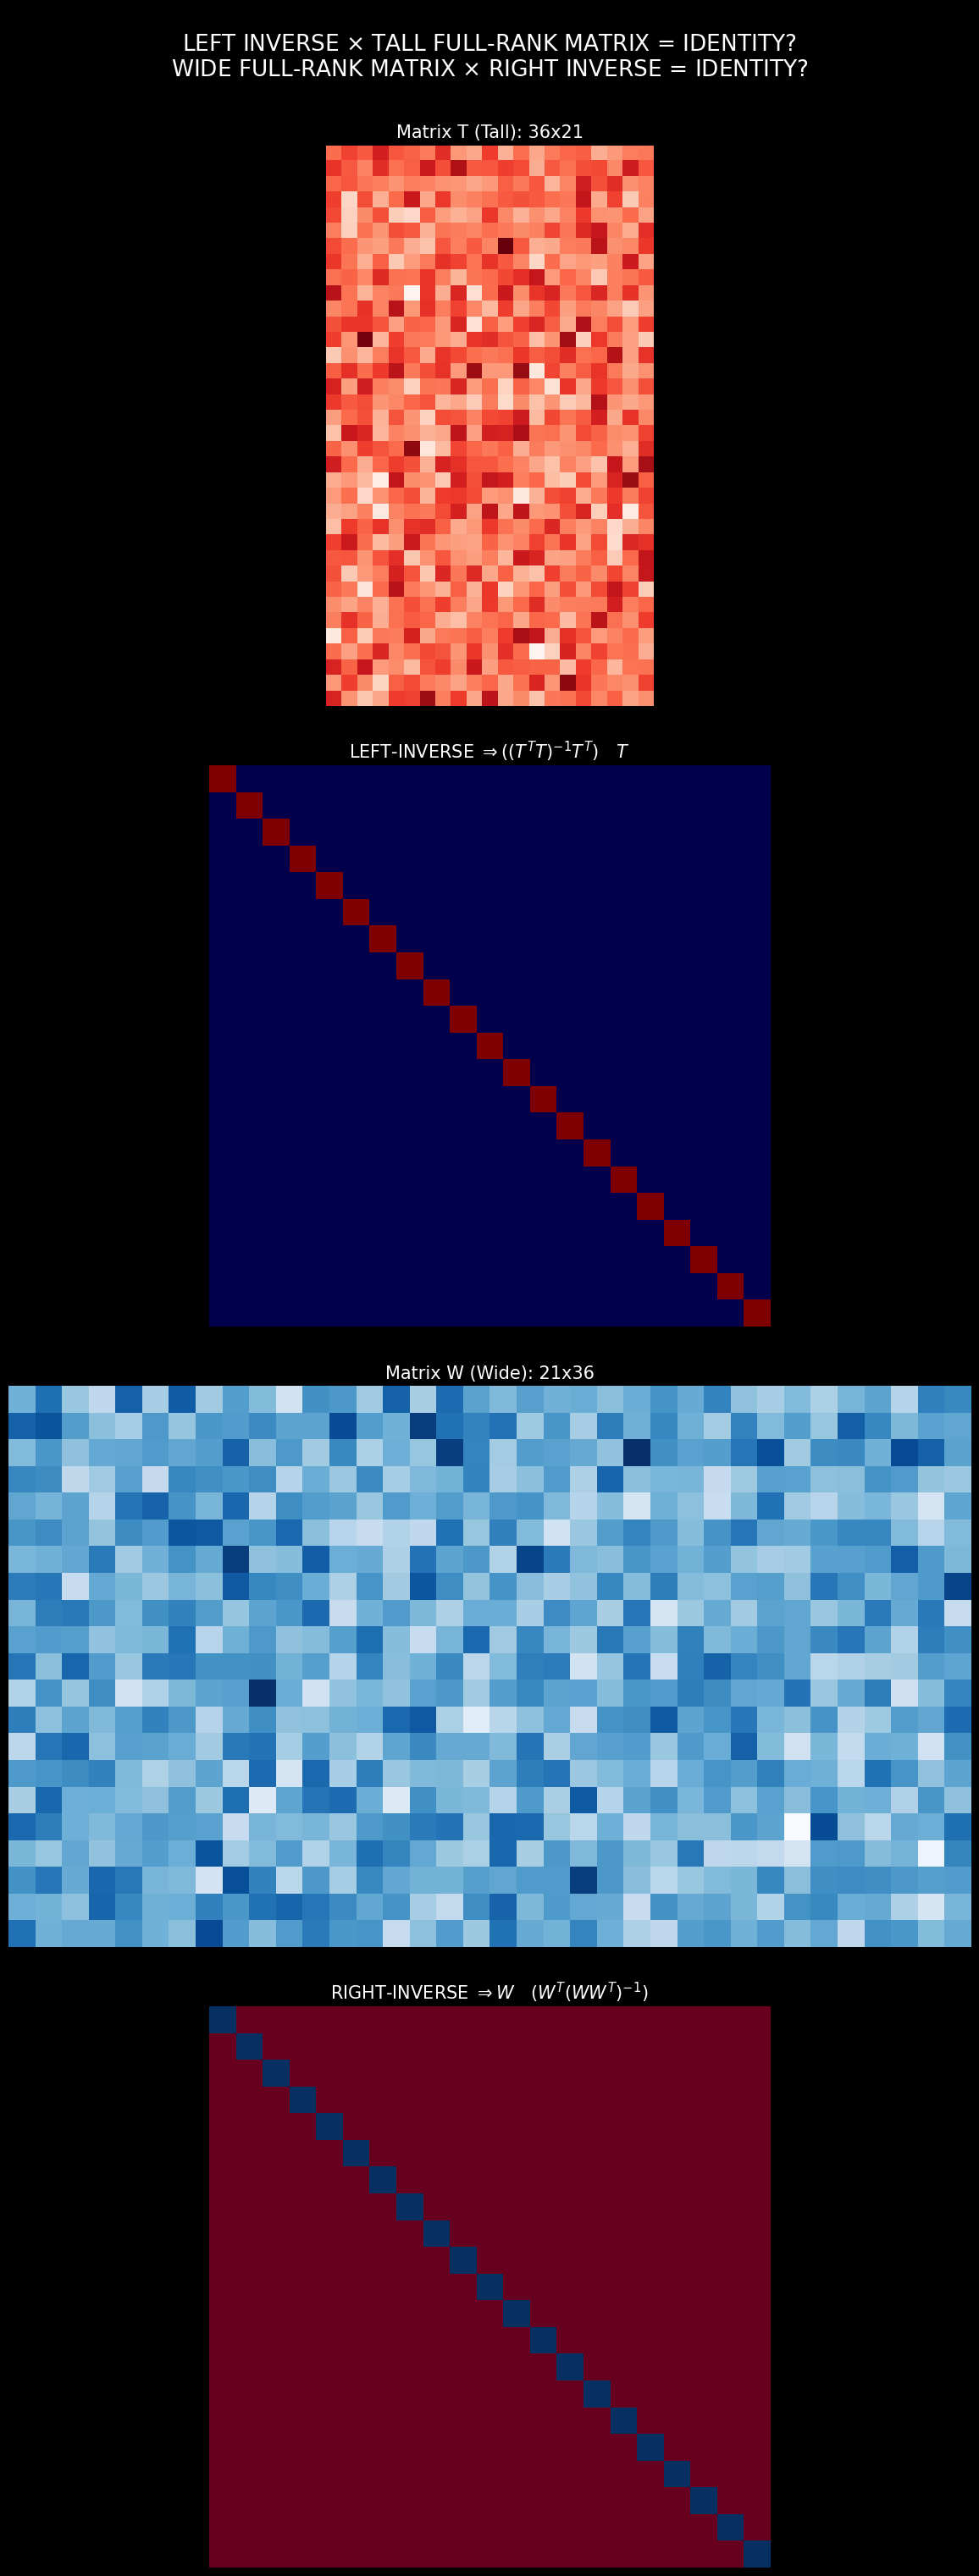

In [141]:
with plt.style.context('dark_background'):
    # Create figure:
    fig = plt.figure(figsize=(23, 31))

    # Define rows and columns via GridSpec:
    gs = GridSpec(4, 1, figure=fig)

    # Generate subplots:
    axes = [
        fig.add_subplot(gs[0]),
        fig.add_subplot(gs[1]),
        fig.add_subplot(gs[2]),
        fig.add_subplot(gs[3]),
    ]

    axes[0].imshow(TALL, cmap="Reds")
    axes[0].set_title(f"\nMatrix T (Tall): {m}x{n}", size=15)

    axes[1].imshow(ID_TALL, cmap="seismic")
    axes[1].set_title("\nLEFT-INVERSE $\\Rightarrow ((T^T T)^{-1} T^T) \\quad T$", size=15)

    axes[2].imshow(WIDE, cmap="Blues")
    axes[2].set_title(f"\nMatrix W (Wide): {n}x{m}", size=15)

    axes[3].imshow(ID_WIDE, cmap="RdBu")
    axes[3].set_title("\nRIGHT-INVERSE $\\Rightarrow W \\quad (W^T (W W^T)^{-1})$", size=15)

    for i in range(len(axes)):
        axes[i].axis('off')

    sup_title = "\nLEFT INVERSE $\\times$ TALL FULL-RANK MATRIX = IDENTITY?"
    sup_title += "\nWIDE FULL-RANK MATRIX $\\times$ RIGHT INVERSE = IDENTITY?\n\n"
    plt.suptitle(sup_title, size=19)

    plt.tight_layout()
    plt.show()

-   We got the ID Matrix both times. Time for supper.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://www.andrewblais.dev/

</font>